In [2]:
import numpy as np

gt = np.load('../runs/kol/20/gtNpy.npy')
pred = np.load('../runs/kol/20/predNpy.npy')




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
# Assuming gt and pred are numpy arrays of shape [1, 1, T, 1, H, W]
# Extract the relevant dimensions (T, H, W)
save_dir = '/home/users/nus/e1333861/autoreg-pde-diffusion/runs/kol/22'
gt = np.load(os.path.join(save_dir, 'gtNpy.npy'))
pred = np.load(os.path.join(save_dir, 'predNpy.npy'))

vmin = min(np.min(gt), np.min(pred[:,:,-1,:]))
vmax = max(np.max(gt), np.max(pred[:,:,-1,:]))
print('vmin, vmax:', vmin, vmax)


vmin, vmax: -2.1492965 2.1564505


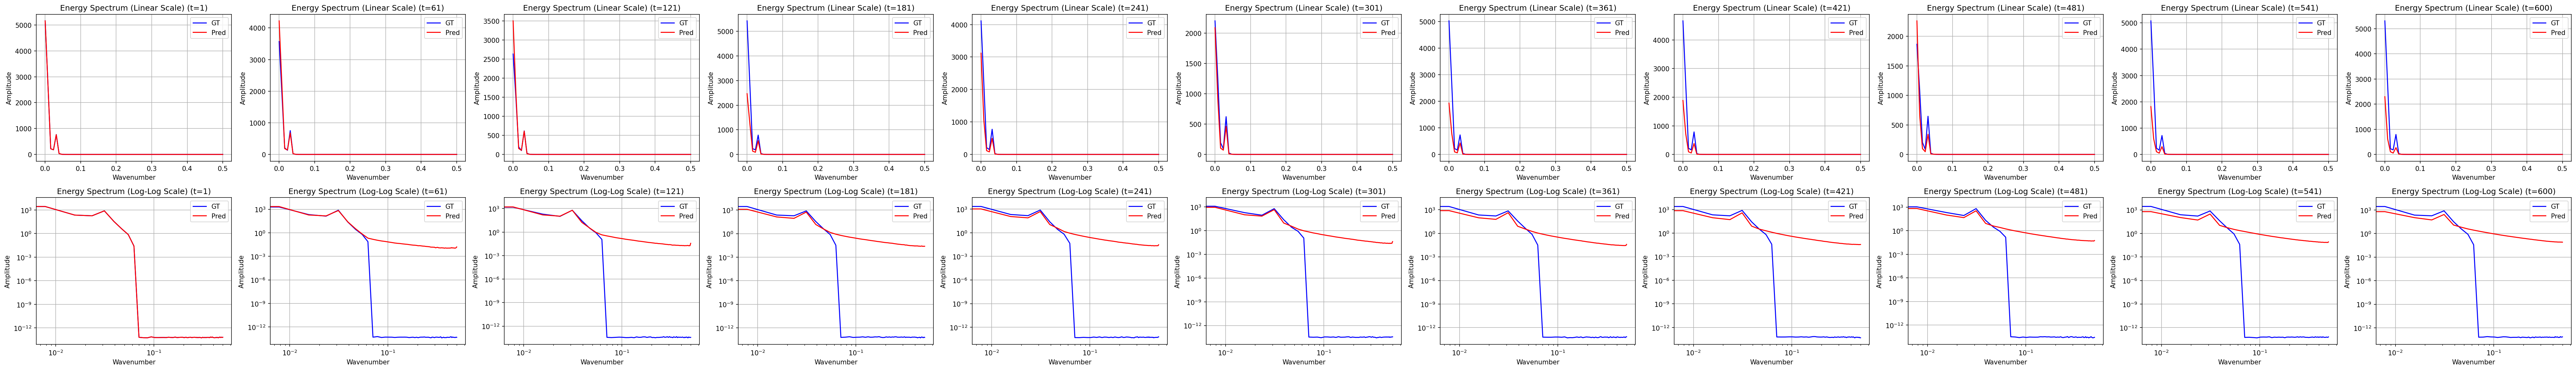

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
# Assuming gt and pred are numpy arrays of shape [1, 1, T, 1, H, W]
# Extract the relevant dimensions (T, H, W)
save_dir = '/home/users/nus/e1333861/autoreg-pde-diffusion/runs/kol/22'
gt = np.load(os.path.join(save_dir, 'gtNpy.npy'))
pred = np.load(os.path.join(save_dir, 'predNpy.npy'))
timeSteps = [i * gt.shape[2] // 10 for i in range(10)] + [gt.shape[2]-1]
T = len(timeSteps)
H, W = gt.shape[4], gt.shape[5]

fig, axs = plt.subplots(nrows=2, ncols=T, figsize=(T * 5, 2 * 4), dpi=150, squeeze=False)

# Loop through each timestamp to calculate and plot the combined energy spectrum
t = 0
for tau in timeSteps:
    # Extract gt and pred arrays at timestamp t
    gt_t = gt[0, 0, tau, 0, :, :]
    pred_t = pred[0, 0, tau, 0, :, :]
    
    # Round up the size along each axis to an even number
    n_H = int(math.ceil(H / 2.) * 2)
    n_W = int(math.ceil(W / 2.) * 2)
    
    # Compute the 2D Fourier transform for gt and pred using rfft along both axes
    fft_gt_x = np.fft.rfft(gt_t, n=n_W, axis=1)
    fft_gt_y = np.fft.rfft(gt_t, n=n_H, axis=0)

    fft_pred_x = np.fft.rfft(pred_t, n=n_W, axis=1)
    fft_pred_y = np.fft.rfft(pred_t, n=n_H, axis=0)
    
    # Compute power spectrum (multiply by complex conjugate)
    energy_gt_x = fft_gt_x.real ** 2 + fft_gt_x.imag ** 2
    energy_gt_y = fft_gt_y.real ** 2 + fft_gt_y.imag ** 2

    energy_pred_x = fft_pred_x.real ** 2 + fft_pred_x.imag ** 2
    energy_pred_y = fft_pred_y.real ** 2 + fft_pred_y.imag ** 2

    # Average over appropriate axes
    energy_gt_x = energy_gt_x.sum(axis=0) / fft_gt_x.shape[0]
    energy_gt_y = energy_gt_y.sum(axis=1) / fft_gt_y.shape[1]

    energy_pred_x = energy_pred_x.sum(axis=0) / fft_pred_x.shape[0]
    energy_pred_y = energy_pred_y.sum(axis=1) / fft_pred_y.shape[1]

    # Combine energies for a single spectrum
    energy_gt = 0.5 * (energy_gt_x + energy_gt_y)
    energy_pred = 0.5 * (energy_pred_x + energy_pred_y)

    # Generate wavenumber axis (only for positive frequencies)
    wavenumber_x = np.fft.rfftfreq(n_W)
    wavenumber_y = np.fft.rfftfreq(n_H)

    # Since energy_gt and energy_pred are averaged over x and y axes, 
    # we use the wavenumber from one of the axes (they represent equivalent ranges)
    wavenumber = wavenumber_x  # or wavenumber_y, since the final energy spectrum is averaged

    # Sort wavenumber and energy values in descending order
    sorted_indices = np.argsort(wavenumber)[::-1]
    wavenumber_sorted = wavenumber[sorted_indices]
    energy_gt_sorted = energy_gt[sorted_indices]
    energy_pred_sorted = energy_pred[sorted_indices]

    # Plotting the combined energy spectrum for gt and pred (linear scale)

    axs[0, t].plot(wavenumber_sorted, energy_gt_sorted, label='GT', color='blue')
    axs[0, t].plot(wavenumber_sorted, energy_pred_sorted, label='Pred', color='red')
    axs[0, t].set_title(f"Energy Spectrum (Linear Scale) (t={tau+1})")
    axs[0, t].set_xlabel('Wavenumber')
    axs[0, t].set_ylabel('Amplitude')
    axs[0, t].grid(True)
    axs[0, t].legend()

    # Plotting the combined energy spectrum for gt and pred (log-log scale)
    axs[1, t].plot(wavenumber_sorted, energy_gt_sorted, label='GT', color='blue')
    axs[1, t].plot(wavenumber_sorted, energy_pred_sorted, label='Pred', color='red')
    axs[1, t].set_xscale('log')
    axs[1, t].set_yscale('log')
    axs[1, t].set_title(f"Energy Spectrum (Log-Log Scale) (t={tau+1})")
    axs[1, t].set_xlabel('Wavenumber')
    axs[1, t].set_ylabel('Amplitude')
    axs[1, t].grid(True)
    axs[1, t].legend()
    t += 1

# Adjust layout for better viewing
plt.tight_layout()
plt.show()



### plot spectrum of multiple models

AxisError: axis 1 is out of bounds for array of dimension 1

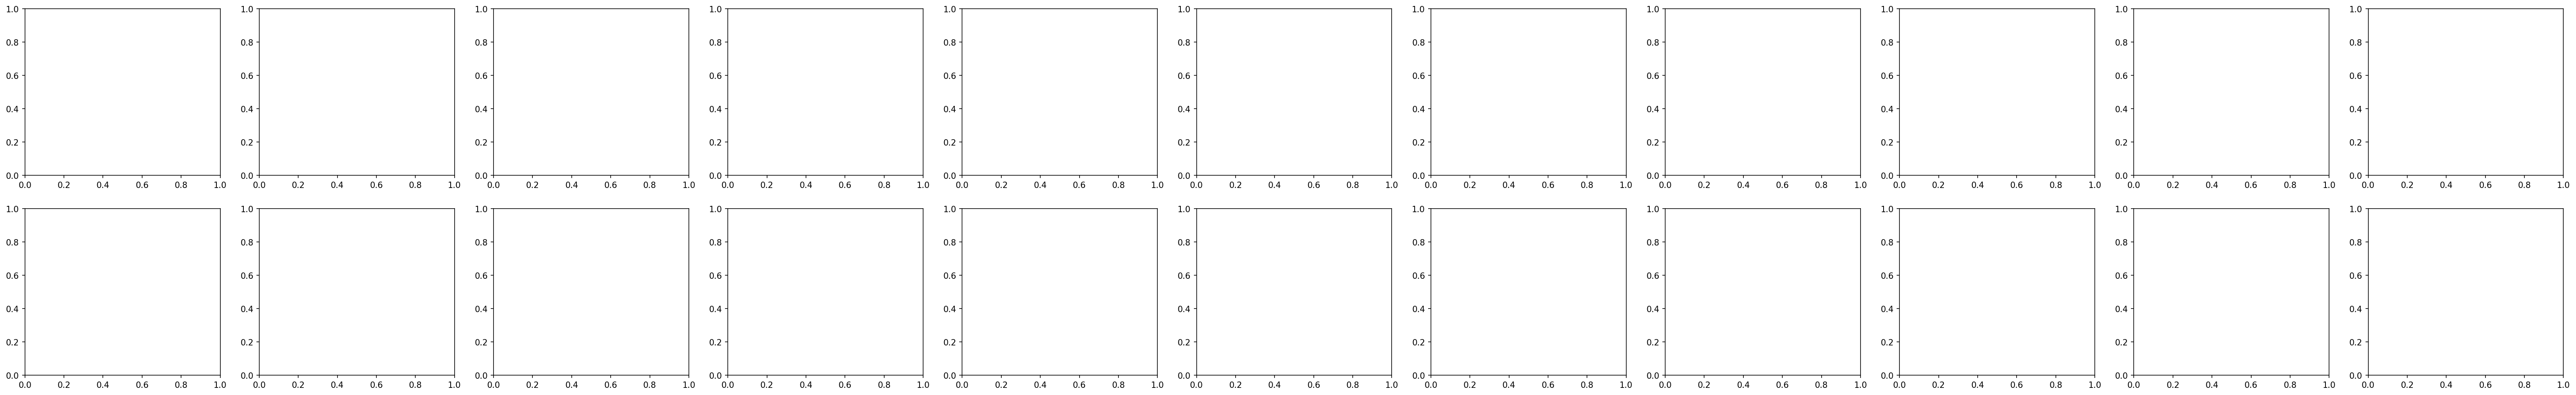

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os


save_dir = '../runs/{}/{}'.format('kol', '22')


gt = np.load('../runs/kol/22/gtNpy.npy')
pred = np.load('../runs/kol/22/predNpy.npy')

gt1 = np.load('../runs/kol/23/gtNpy.npy')
pred1 = np.load('../runs/kol/23/predNpy.npy')

timeSteps = [i * gt.shape[2] // 10 for i in range(10)] + [gt.shape[2]-1]
T = len(timeSteps)
H, W = gt.shape[4], gt.shape[5]

fig_new, axs = plt.subplots(nrows=2, ncols=T, figsize=(T * 5, 2 * 4), dpi=150, squeeze=False)

# Loop through each timestamp to calculate and plot the combined energy spectrum
t = 0
for tau in timeSteps:
    # Extract gt and pred arrays at timestamp t
    gt_t = gt[0, 0, tau, 0, :, :]
    pred_t = pred[0, 0, tau, 0, :, :]

    gt1_t = gt1[0, 0, tau, 0, :, :]
    pred1_t = pred1[0, 0, tau, 0, :, :]
    
    # Round up the size along each axis to an even number
    n_H = int(math.ceil(H / 2.) * 2)
    n_W = int(math.ceil(W / 2.) * 2)
    
    # Compute the 2D Fourier transform for gt and pred using rfft along both axes
    fft_gt_x = np.fft.rfft(gt_t, n=n_W, axis=1)
    fft_gt_y = np.fft.rfft(gt_t, n=n_H, axis=0)

    fft_pred_x = np.fft.rfft(pred_t, n=n_W, axis=1)
    fft_pred_y = np.fft.rfft(pred_t, n=n_H, axis=0)
    fft_pred1_x = np.fft.rfft(pred1_t, n=n_W, axis=1)
    fft_pred1_y = np.fft.rfft(pred1_t, n=n_H, axis=0)  

    # Compute power spectrum (multiply by complex conjugate)
    energy_gt_x = fft_gt_x.real ** 2 + fft_gt_x.imag ** 2
    energy_gt_y = fft_gt_y.real ** 2 + fft_gt_y.imag ** 2

    energy_pred_x = fft_pred_x.real ** 2 + fft_pred_x.imag ** 2
    energy_pred1_y = fft_pred1_y.real ** 2 + fft_pred1_y.imag ** 2
    energy_pred_x = fft_pred_x.real ** 2 + fft_pred_x.imag ** 2
    energy_pred1_y = fft_pred1_y.real ** 2 + fft_pred1_y.imag ** 2

    # Average over appropriate axes
    energy_gt_x = energy_gt_x.sum(axis=0) / fft_gt_x.shape[0]
    energy_gt_y = energy_gt_y.sum(axis=1) / fft_gt_y.shape[1]

    energy_pred_x = energy_pred_x.sum(axis=0) / fft_pred_x.shape[0]
    energy_pred_y = energy_pred_y.sum(axis=1) / fft_pred_y.shape[1]
    energy_pred1_x = energy_pred1_x.sum(axis=0) / fft_pred1_x.shape[0]
    energy_pred1_y = energy_pred1_y.sum(axis=1) / fft_pred1_y.shape[1]

    # Combine energies for a single spectrum
    energy_gt = 0.5 * (energy_gt_x + energy_gt_y)
    energy_pred = 0.5 * (energy_pred_x + energy_pred_y)
    energy_pred1 = 0.5 * (energy_pred1_x + energy_pred1_y)

    # Generate wavenumber axis (only for positive frequencies)
    wavenumber_x = np.fft.rfftfreq(n_W)
    wavenumber_y = np.fft.rfftfreq(n_H)

    # Since energy_gt and energy_pred are averaged over x and y axes, 
    # we use the wavenumber from one of the axes (they represent equivalent ranges)
    wavenumber = wavenumber_x  # or wavenumber_y, since the final energy spectrum is averaged

    # Sort wavenumber and energy values in descending order
    sorted_indices = np.argsort(wavenumber)[::-1]
    wavenumber_sorted = wavenumber[sorted_indices]
    energy_gt_sorted = energy_gt[sorted_indices]
    energy_pred_sorted = energy_pred[sorted_indices]
    energy_pred1_sorted = energy_pred1[sorted_indices]

    # np.save(os.path.join(save_dir, 'wavenumber_sorted.npy'), wavenumber_sorted )
    # np.save(os.path.join(save_dir, 'energy_gt_sorted.npy'), energy_gt_sorted )
    # np.save(os.path.join(save_dir, 'energy_pred_sorted.npy'), energy_pred_sorted )


    # Plotting the combined energy spectrum for gt and pred (linear scale)

    axs[0, t].plot(wavenumber_sorted, energy_gt_sorted, label='GT', color='blue')
    axs[0, t].plot(wavenumber_sorted, energy_pred_sorted, label='ControlNet', color='red')
    axs[0, t].plot(wavenumber_sorted, energy_pred1_sorted, label='Single Tower', color='cyan')
    axs[0, t].set_title(f"Energy Spectrum (Linear Scale) (t={tau+1})")
    axs[0, t].set_xlabel('Wavenumber')
    axs[0, t].set_ylabel('Amplitude')
    axs[0, t].grid(True)
    axs[0, t].legend()

    # Plotting the combined energy spectrum for gt and pred (log-log scale)
    axs[1, t].plot(wavenumber_sorted, energy_gt_sorted, label='GT', color='blue')
    axs[1, t].plot(wavenumber_sorted, energy_pred_sorted, label='ControlNet', color='red')
    axs[1, t].plot(wavenumber_sorted, energy_pred1_sorted, label='Single Tower', color='cyan')
    axs[1, t].set_xscale('log')
    axs[1, t].set_yscale('log')
    axs[1, t].set_title(f"Energy Spectrum (Log-Log Scale) (t={tau+1})")
    axs[1, t].set_xlabel('Wavenumber')
    axs[1, t].set_ylabel('Amplitude')
    axs[1, t].grid(True)
    axs[1, t].legend()
    t += 1

# Adjust layout for better viewing
plt.tight_layout()
# fig_new.savefig(os.path.join(save_dir, config.experiment.freq_plot_file_name) + '_{}.png'.format(epoch))

plt.show()

### viz graph torch

/home/users/nus/e1333861/anaconda3/envs/acdm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


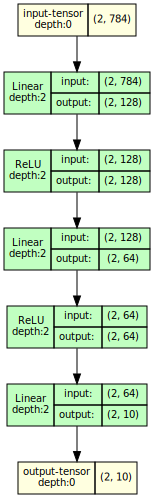

In [3]:
from torchview import draw_graph
import torch

import torch
import torch.nn as nn

# Define the MLP class
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(SimpleMLP, self).__init__()
        layers = []
        in_dim = input_size
        # Add hidden layers
        for h_dim in hidden_sizes:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(nn.ReLU())
            in_dim = h_dim
        # Add output layer
        layers.append(nn.Linear(in_dim, output_size))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# Instantiate the MLP
input_size = 784            # Example input size (e.g., 28x28 images flattened)
hidden_sizes = [128, 64]    # Hidden layers with 128 and 64 neurons
output_size = 10            # Example output size (e.g., 10 classes for classification)

mlp = SimpleMLP(input_size, hidden_sizes, output_size)


batch_size = 2
# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(mlp, input_size=(batch_size, 784), device='cpu')
model_graph.visual_graph

### Test a diffusion model forward pass

In [7]:
import os
import sys

project_root = '/home/users/nus/e1333861/decodiff'
sys.path.append(project_root)
from omegaconf import OmegaConf
from src.model.diffusion import * #DiffusionModel  # Use absolute imports
from src.kol_dataloader import kolTorchDataset
from src.utils.get_model import get_model

from torch.utils.data import DataLoader, DistributedSampler, Dataset
config = OmegaConf.load('/home/users/nus/e1333861/decodiff/configs/diffusion_denoise.yaml')

model = get_model(config)




In [5]:


def get_validation_dataloader(batch_size, rank, world_size, config):
    test_set = kolTorchDataset(
                split= "val",                 
                data_path = config.data.data_dirs,
                window_length=config.data.rollout_total_seq_len,
                k=config.data.val_downsample_k,
                train_ratio = config.data.train_ratio,
                val_ratio = config.data.val_ratio,
                standardize=True,
                crop=config.data.crop)
    sampler = DistributedSampler(test_set, num_replicas=world_size, rank=rank, shuffle=False)
    dataloader = DataLoader(test_set, batch_size=1, sampler=sampler)
    return dataloader

In [ ]:
# data = torch.rand(2, 1, 18, 128, 128)
# cond = torch.rand(2, 1, 2, 128, 128)
model.eval()

# train_loader, train_set = get_dataloader(2, 0, 1, config, "train")
val_loader = get_validation_dataloader(2, 0, 1, config)


rank = 0
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
numSamples = 1

### test custom diffusion modelling

In [2]:
import torch
xx = torch.rand((2,32768))
tt = torch.rand((2, 1))

yy = xx*tt

yy.shape

torch.Size([2, 32768])